<a href="https://colab.research.google.com/github/karsakami/Fullstack-Datascience/blob/main/Overfitting_vs_Underfitting_and_preventing_them.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **In a nutshell** - we can compare models to students: 



*   **underfitting model** is a **bad student** who has not learned content that the professor said that will be on the exam good enought 

*   **overfitting model** is a student who didnt learn concepts, he just remember formulas, like remember formula for the area of a triangle, memorizee it but didnt understood - so he score good at trening data, but poorly on test data



**When it occurs?** 

**Underfitting** - when we choose a bad algorithm compare to the problem that we are facing. For example when we are facing non linear problem, but we choose a linear regression algorithm.

In the below we can see the **overfitting** and **underfitting** in various algorithms - regression and classification

We want this model in the middle

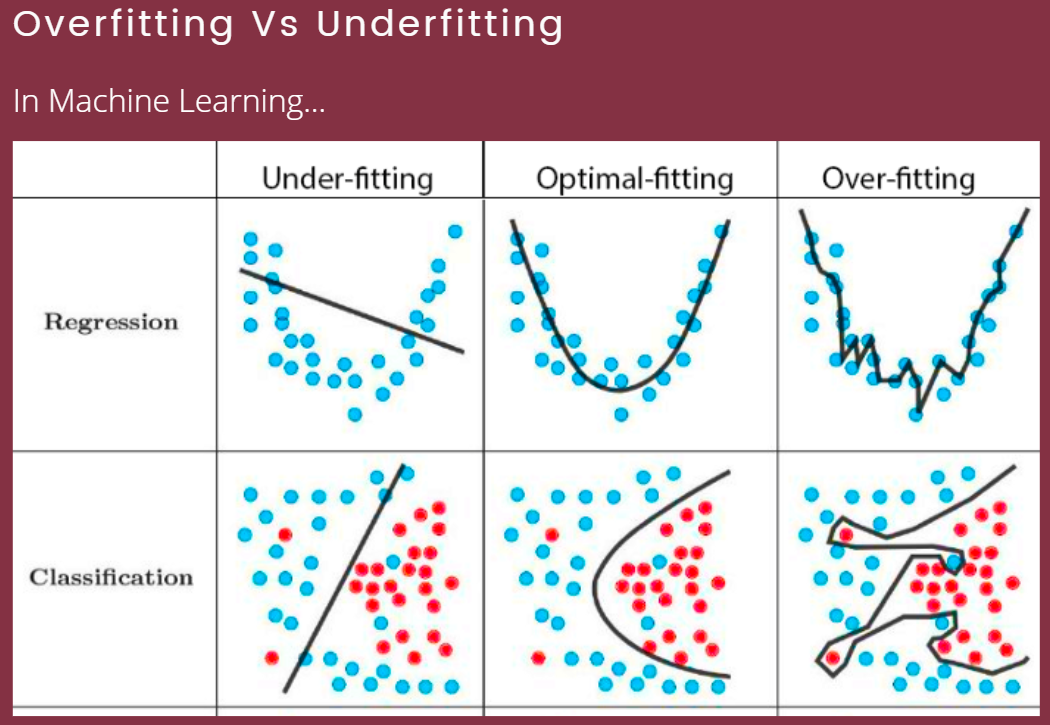

# **Preventing**

# **1) - Upsampling (adding data, balancing)**

**We will use fruit data in this case because its a little faster, but it works analogically in medical data ofcourse.**

So lets build a simple linear regression model thats predicting a fruit label based on the independent $x$ features like height, mass, color.

Importing and loading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fruit_data = pd.read_csv('/content/fruit_dataset (1).csv')

Preview

In [ ]:
fruit_data.head(10)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


Checking classes, we see mandarin and mango are highly dominated by the rest of fruits and the aftermath may be overfitting.

In [ ]:
fruit_data['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

Lets split data and create a dependent data $y$ and independent $x$ because we have to do this to create a linear regression

In [ ]:
x = fruit_data.iloc[:,2:5]
y = fruit_data.iloc[:,0]

# **First** we need to identify if model is overfitting on dataset

Importing function from sklearn which will help us to split data to training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state=1)

Importing a linear regression because we want to see if data is overfitting on this algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

# creating instantion
lr = LogisticRegression()

# fitting on data (algorithm learns on data)
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##So we just validate if we have error in learning like **overfitting** or **underfitting** and we check it by checking score on training and testing data
##So we see **overfitting** here

In [ ]:
from sklearn import metrics 

# see if model is doing ok on data
print("Training data", lr.score(x_train, y_train))
print("Test data", lr.score(x_test, y_test))

Training data 0.7291666666666666
Test data 0.46153846153846156


To prevent this, we need to look at the data. 

We see that the:
 * apple has fruit label 1 
 * mandarin has fruit label 2
 * orange has fruit label 3
 * lemon has 4

In [ ]:
fruit_data.head(15)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


Now lets check how many fruits are in dataset. 

One of the reasons of the overfitting can be class domination. It occurs here, we see apple, orange and lemons dominated the dataset.

Thts why we shoud check if our data is balanced

In [ ]:
fruit_data['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

But we can do something to balance this data and its called **resampling**

In this case we will use upsampling (which is resampling technique) because we want to increase the number of data 

Import lib

In [ ]:
from sklearn.utils import resample

Specifying which data point we want to resample (increase the size) - in this case mandarin. We just create a variable where fruit label == 2 (its mandarin)

In [ ]:
mandarin = fruit_data[fruit_data.fruit_label==2]

Now specify which datapont we want to match. Similarly to code above - we create a apple dataset

In [ ]:
apple = fruit_data[fruit_data.fruit_label==1]

Lets see our dataset - its every row there fruit label is 1

In [ ]:
mandarin

,fruit_label,fruit_name,mass,width,height,color_score
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81


Now, if we created 2 variables - first which will be upsampled, and second which which is the element we want to approach in terms of the number of samples - we want to use a resample function on them.

So we create variable called upsampled data. First argument is a variable to upsample, 3rd is size we wanna match, 

In [ ]:
mandarin_data_upsampled = resample(mandarin,
                                   replace = True, # sample with replacement
                                   n_samples = len(apple)-5, # how many we want to add, 
                                   random_state=67) # set this to whatever num u want

Lets look at our data that we created

In [ ]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.8,4.3,0.77
4,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,80,5.9,4.3,0.81
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
3,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,80,5.9,4.3,0.81


Now we do the same stuff for other classes we wanna upsample

Ok so now we must just replace this data, join it to original dataset. 

Remember that our original dataset is called **fruit data**

Lets concat these datasets together in one variable

In [ ]:
frame = [fruit_data,mandarin_data_upsampled]

fruit_data = pd.concat(frame, axis=0)

Lets see the our upsampled data

In [ ]:
fruit_data['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

Ok now we just want to upsample all cases.

Create a variable called mango

In [ ]:
mango = fruit_data[fruit_data.fruit_label==5]

We see like its above 

In [ ]:
mango

,fruit_label,fruit_name,mass,width,height,color_score
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78


Ok so lets just do it analogically as above

In [ ]:
mango_data_upsampled = resample(mango,
                                replace=True,
                                n_samples = 17,
                                random_state=67)

In [ ]:
frame2 = [fruit_data, mango_data_upsampled]

fruit_data = pd.concat(frame2, axis=0)

In [ ]:
fruit_data['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

Lets now build same logistic regression algorithm on **new data** and look at the performance, because previously model were overfitting seriously.

 

Lets now split the data again, create the $x$ and $y$ variable. 

In [ ]:
x = fruit_data.iloc[:,2:5] # 1st arguemnt represent rows, 2nd - columns
y = fruit_data.iloc[:,0]

In [ ]:
fruit_data['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

Now lets split our new variables to training and test data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state=1)

Data is splitted, now just fit model on them

In [ ]:
from sklearn.linear_model import LogisticRegression

# creating instantion
lr = LogisticRegression()

# fitting on data (algorithm learns on data)
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Lets see how model is perfoming on upsampled data. We need **metrics**

We see now a diametrical improvement.

In [ ]:
from sklearn import metrics 

# see if model is doing ok on data
print("Training data", lr.score(x_train, y_train))
print("Test data", lr.score(x_test, y_test))

Training data 0.7671232876712328
Test data 0.7894736842105263
